In [1]:
import numpy as np
from scipy.io import loadmat,savemat
# from commons17 import skeleton_utils

import vis_image

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xa

In [2]:
data_path = './staticPose.mat'

K = loadmat(data_path)['di']

In [ ]:
print k

In [3]:
print K.shape

hip_right = np.array(K[9])
                
hip_left = np.array(K[13])
	
pelvis_pos = (hip_right + hip_left)/2 #interpolating pelvis

K[0] = pelvis_pos

shoulder_left = np.array(K[5])

shoulder_right = np.array(K[2])

neck_pos_prior = K[1]

neck_pos = (shoulder_left + shoulder_right)/2 #interpolating neck

K[1] = neck_pos

del_neck = neck_pos - neck_pos_prior

K[8] = K[8] + del_neck #changing head_pos

K = K - K[0] #making it root relative

K = skeleton_utils.fit_skeleton_frame(K).tolist() #Normalising the bone length

del K[12]#removing ankle joints

del K[15]



(17, 3)


(15, 3)


<IPython.core.display.Javascript object>


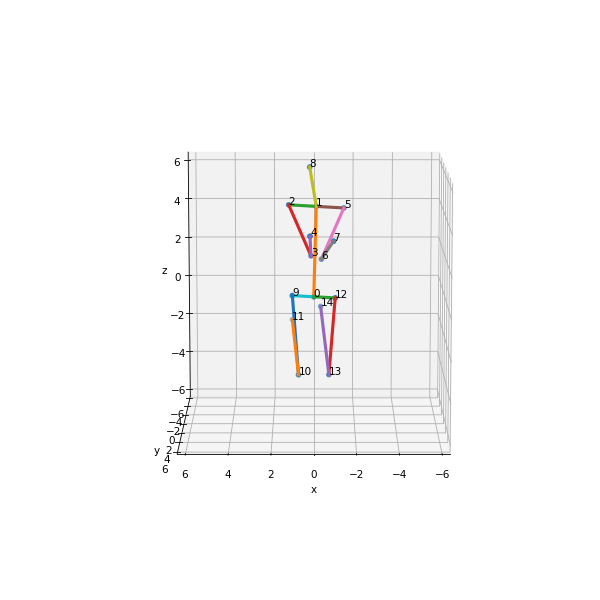

In [4]:
%matplotlib notebook
K = np.array(K)

print K.shape

fig = vis_image.get_figure()

ax1 = vis_image.get_ax(K,fig,az = 90)

vis_image.plot_skeleton_and_scatter(K,ax1)